# 1. Import libraries


In [ ]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# 2. Load data


In [18]:
results_path = "results/results.json"
with open(results_path, "r") as f:
    results = json.load(f)


# 3. Data processing


In [19]:
headers = results["results"]["table"]["head"]["prompts"]

In [20]:
headers

[{'raw': "You're a translator from Japanese to {{targeted_language}}. You're given a Japanese paragraph and you're tasked with translating it to {{targeted_language}}.\n\nJapanese paragraph: {{japanese_paragraph}}\n\n{{targeted_language}} paragraph:",
  'label': "prompts/translator1.txt: You're a translator from Japanese to {{targeted_language}}. You're given a Japanese paragraph and you're tasked with translating it to {{targeted_language}}.\n\nJapanese paragraph: {{japanese_paragraph}}\n\n{{targeted_language}} paragraph:",
  'id': 'ac880093ece78bf3bc2feec9a843e6c2a5df551c00b43d98e523b5b88d306cce',
  'provider': 'openai:gpt-4o-mini',
  'metrics': {'score': 20,
   'testPassCount': 20,
   'testFailCount': 0,
   'assertPassCount': 80,
   'assertFailCount': 0,
   'totalLatencyMs': 87207,
   'tokenUsage': {'total': 12922,
    'prompt': 7588,
    'completion': 5334,
    'cached': 0},
   'namedScores': {},
   'cost': 0.004338600000000001}},
 {'raw': 'You\'re a translator from Japanese to {{t

In [21]:
prompt1 = [item for item in headers if "prompts/translator1.txt" in item["label"]]
prompt2 = [item for item in headers if "prompts/translator2.txt" in item["label"]]

In [14]:
prompt1

[{'raw': "You're a translator from Japanese to {{targeted_language}}. You're given a Japanese paragraph and you're tasked with translating it to {{targeted_language}}.\n\nJapanese paragraph: {{japanese_paragraph}}\n\n{{targeted_language}} paragraph:",
  'label': "prompts/translator1.txt: You're a translator from Japanese to {{targeted_language}}. You're given a Japanese paragraph and you're tasked with translating it to {{targeted_language}}.\n\nJapanese paragraph: {{japanese_paragraph}}\n\n{{targeted_language}} paragraph:",
  'id': 'ac880093ece78bf3bc2feec9a843e6c2a5df551c00b43d98e523b5b88d306cce',
  'provider': 'openai:gpt-4o-mini',
  'metrics': {'score': 20,
   'testPassCount': 20,
   'testFailCount': 0,
   'assertPassCount': 0,
   'assertFailCount': 0,
   'totalLatencyMs': 67379,
   'tokenUsage': {'total': 12909,
    'prompt': 7588,
    'completion': 5321,
    'cached': 0},
   'namedScores': {},
   'cost': 0.004330799999999999}},
 {'raw': "You're a translator from Japanese to {{tar

In [22]:
extracted_data = []     
for item in prompt2:
    provider = item["provider"]
    test_pass_count = item['metrics']['testPassCount']
    test_fail_count = item['metrics']['testFailCount']
    total_test = test_pass_count + test_fail_count
    average_latency = item['metrics']['totalLatencyMs']/total_test
    cost = item['metrics']['cost']
    
    extracted_data.append({
        'provider': provider,
        'total_test': total_test,
        'average_latency': average_latency,
        'cost': cost
    })

In [23]:
extracted_data

[{'provider': 'openai:gpt-4o-mini',
  'total_test': 20,
  'average_latency': 5118.9,
  'cost': 0.0051768000000000005},
 {'provider': 'openai:gpt-4o',
  'total_test': 20,
  'average_latency': 3861.45,
  'cost': 0.14511500000000002},
 {'provider': 'anthropic:messages:claude-3-haiku-20240307',
  'total_test': 20,
  'average_latency': 2918.9,
  'cost': 0.013413000000000005},
 {'provider': 'anthropic:messages:claude-3-sonnet-20240229',
  'total_test': 20,
  'average_latency': 6734.15,
  'cost': 0.16308600000000004},
 {'provider': 'anthropic:messages:claude-3-5-sonnet-20240620',
  'total_test': 20,
  'average_latency': 4608.75,
  'cost': 0.157221}]

# 4. Show graphs


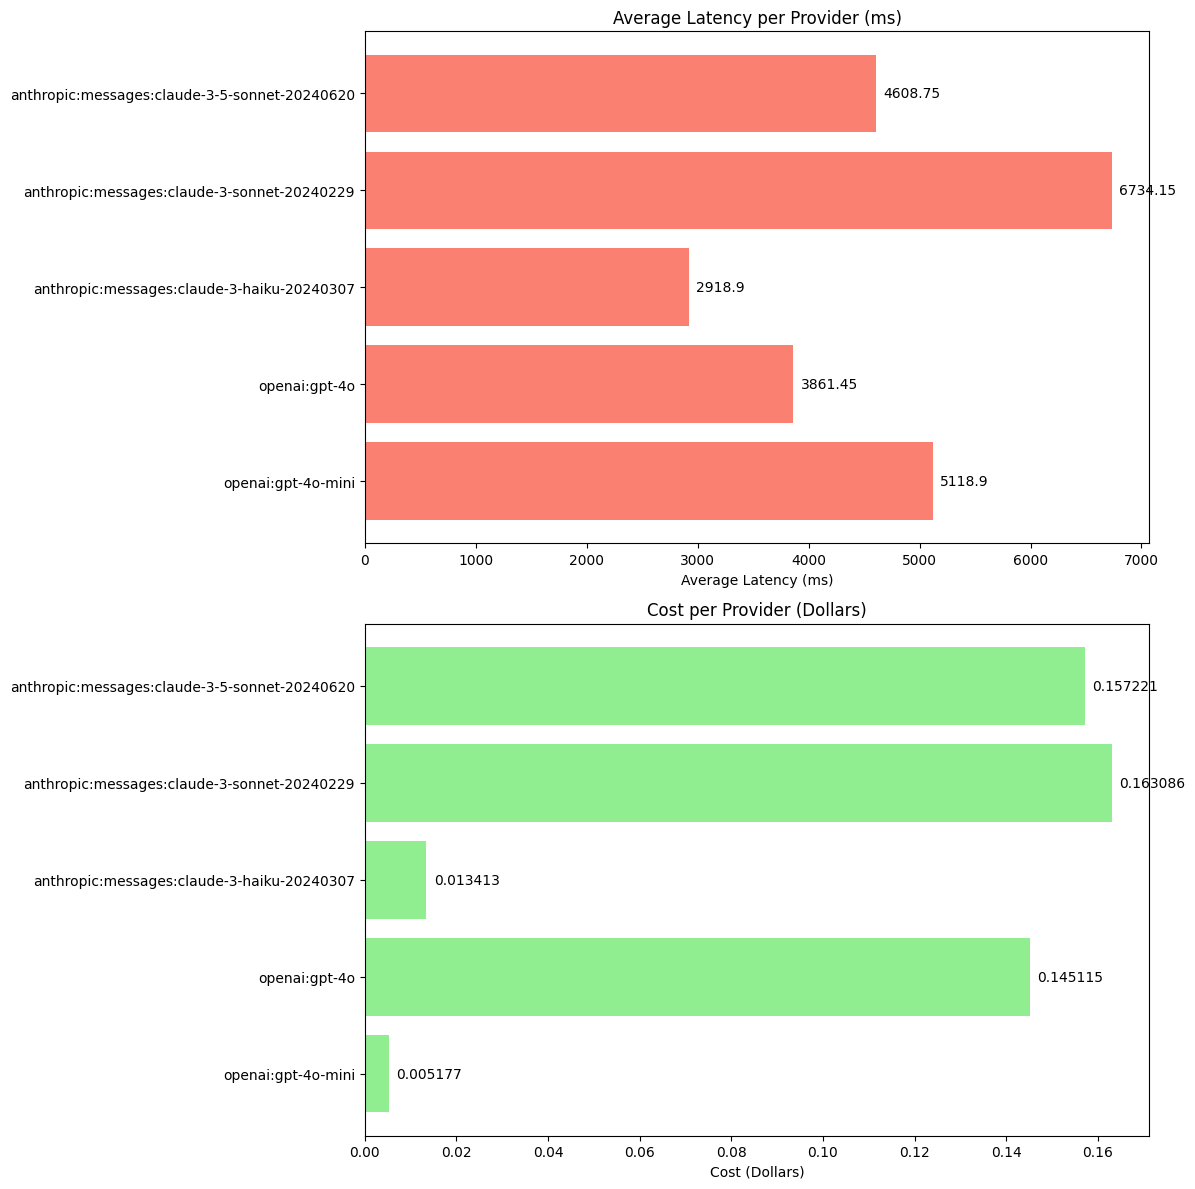

In [24]:
# Extract values for plotting
providers = [entry['provider'] for entry in extracted_data]
average_latencies = [entry['average_latency'] for entry in extracted_data]
costs = [entry['cost'] for entry in extracted_data]

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

def add_labels_horizontal(ax, values, type):
    """Add labels on the end of each horizontal bar."""
    if type == 'latency':
        for i, value in enumerate(values):
            ax.text(value + max(values) * 0.01, i, f'{value}', va='center')
    elif type == 'cost':
        for i, value in enumerate(values):
            ax.text(value + max(values) * 0.01, i, f'{value:.6f}', va='center')
    else:
        raise ValueError(f"Invalid type: {type}")

# Plot Average Latency
axs[0].barh(providers, average_latencies, color='salmon')
axs[0].set_title('Average Latency per Provider (ms)')
axs[0].set_xlabel('Average Latency (ms)')
add_labels_horizontal(axs[0], average_latencies, 'latency')

# Plot Cost
axs[1].barh(providers, costs, color='lightgreen')
axs[1].set_title('Cost per Provider (Dollars)')
axs[1].set_xlabel('Cost (Dollars)')
add_labels_horizontal(axs[1], costs, 'cost')

# Adjust layout
plt.tight_layout()
plt.show()